In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv("data/final.csv", header=0)
df.head()

,matchId,blueWins,blueWardsPlaced,blueControlWardsPlaced,blueWardsDestroyed,blueControlWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,...,redTowersDestroyed,redPlatesDestroyed,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redFirstTurret,redInhibitorsDestroyed,redFirstDragon,gameDuration
0,KR_7103467251,1,43,9,10,3,1,12,15,14,...,1,3,29411,30691,349,103,1,0,1,2343.847
1,KR_7029911546,1,36,11,5,3,1,8,5,9,...,0,4,24827,30167,403,106,0,0,0,1939.513
2,KR_7077250839,1,33,11,6,2,1,10,14,6,...,1,2,28200,29638,341,100,1,0,0,1553.700
3,KR_7101806500,0,28,5,8,5,0,14,23,9,...,1,6,31584,31717,355,82,1,0,1,2213.758
4,KR_7099122531,1,29,7,6,5,1,14,13,19,...,0,1,27239,29741,340,84,0,0,1,1470.118


In [3]:
shape = df.shape
print(f"The data has {shape[0]} rows and {shape[1]} columns")

The data has 94355 rows and 43 columns


## Columns meaning
| **Names** | **Description** | Notes |
| --- | --- | --- |
| blueWins| Whether the blue team won or not |  |
| firstBlood | First kill in the game | Both |
| Kills | Total kills in the game | Both |
| Deaths | Total deaths in the game | Both |
| Assists | Total assists in the game | Both |
| WardsPlaced | Total wards placed in the game | Both |
| WardsDestroyed | Total wards destroyed in the game | Both | 
| ControlWardsPlaced | Total control wards placed in the game | Both |
| ControlWardsDestroyed | Total control wards destroyed in the game | Both | 
| Dragons | Total dragons a team secured in the game | Both |
| Herald | Whether a team secured a herald in the game | Both | 
| Void Grubs | Total void grubs a team secured in the game | Both |
| TowersDestroyed | Total towers destroyed in the game | Both |
| PlatesDestroyed | Total plates destroyed in the game | Both |
| TotalGold | Total gold at 15th minute | Both |
| TotalExperience | Total experience at 15th minute | Both |
| TotalMinionsKilled | Total minions killed at 15th minute | Both | 
| TotalJungleMinionsKilled | Total jungle minions killed at 15th minute | Both | 
| CSPerMin | Amount of minions killed per minute | Both | 
| GoldPerMin | Amount of gold earn per minute | Both |
| FirstTurret | Whether a team secured the first turret in the game | Both |
| InhibitorsDestroyed | Total inhibitors destroyed in the game | Both |
| FirstDragon | Whether a team secured the first dragon in the game | Both |
| gameDuration | Game length in seconds | |

### Notes:
- Both: Both teams will have a column for this variable

## Let's check each column types

In [4]:
print(df.dtypes)

matchId                          object
blueWins                          int64
blueWardsPlaced                   int64
blueControlWardsPlaced            int64
blueWardsDestroyed                int64
blueControlWardsDestroyed         int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueDragons                       int64
blueHeralds                       int64
blueVoidGrubs                     int64
blueTowersDestroyed               int64
bluePlatesDestroyed               int64
blueTotalGold                     int64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueFirstTurret                   int64
blueInhibitorsDestroyed           int64
blueFirstDragon                   int64
redWardsPlaced                    int64
redControlWardsPlaced             int64
redWardsDestroyed                 int64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,94355.0,0.463558,0.498673,0.000,0.000,0.000,1.00,1.000
blueWardsPlaced,94355.0,47.808871,39.392788,9.000,30.000,35.000,48.00,521.000
blueControlWardsPlaced,94355.0,6.943522,2.541030,0.000,5.000,7.000,9.00,25.000
blueWardsDestroyed,94355.0,9.888824,4.043725,0.000,7.000,9.000,12.00,54.000
blueControlWardsDestroyed,94355.0,4.172296,1.889871,0.000,3.000,4.000,5.00,15.000
blueFirstBlood,94355.0,0.494420,0.499972,0.000,0.000,0.000,1.00,1.000
blueKills,94355.0,12.546012,4.840475,0.000,9.000,12.000,16.00,43.000
blueDeaths,94355.0,12.680801,4.813805,0.000,9.000,12.000,16.00,41.000
blueAssists,94355.0,14.778380,6.987882,0.000,10.000,14.000,19.00,55.000
blueDragons,94355.0,0.580202,0.665081,0.000,0.000,0.000,1.00,2.000


At first look, we can see that there are some games where team can secure two heralds, this is completely normal because it was possible in the previous patches. As I said before, League of Legends is a game that is constantly changing, in this case, the game was updated and now it is only possible to secure one herald per game.

We also see that there are games when either team has no jungle minions killed, this is impossible because jungle is a part of the game, no way to avoid it. We will remove these games from the dataset.

In [6]:
df = df[(df["blueTotalJungleMinionsKilled"] != 0) & (df["redTotalJungleMinionsKilled"] != 0)]

## Feature engineering

In [7]:
#KDA
df['blueKDA'] = df.apply(lambda x: (x['blueKills'] + x['blueAssists']) / (0.1 if x['blueDeaths'] == 0 else x['blueDeaths']), axis=1)
df['redKDA'] = df.apply(lambda x: (x['redKills'] + x['redAssists']) / (0.1 if x['redDeaths'] == 0 else x['redDeaths']), axis=1)
df['KDA_Diff'] = df['blueKDA'] - df['redKDA']
#Wards
df['WardsPlacedDiff'] = df['blueWardsPlaced'] - df['redWardsPlaced']
df['WardsDestroyedDiff'] = df['blueWardsDestroyed'] - df['redWardsDestroyed']

#Objectives
df['DragonsDiff'] = df['blueDragons'] - df['redDragons']
df['HeraldsDiff'] = df['blueHeralds'] - df['redHeralds']
df['VoidGrubsDiff'] = df['blueVoidGrubs'] - df['redVoidGrubs']
df['TowersDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed']
df['PlatesDiff'] = df['bluePlatesDestroyed'] - df['redPlatesDestroyed']
df['ObjectivesDiff'] = df['DragonsDiff'] + df['HeraldsDiff'] + df['VoidGrubsDiff'] + df['PlatesDiff'] + df['TowersDiff']

#Resources
df['MinionsDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']
df['JungleDiff'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled']
df["ExpDiff"] = df['blueTotalExperience'] - df['redTotalExperience']
df['GoldDiff'] = df['blueTotalGold'] - df['redTotalGold']

df = df[['KDA_Diff', "ObjectivesDiff", "MinionsDiff", "JungleDiff","ExpDiff", "WardsPlacedDiff", "WardsDestroyedDiff", "GoldDiff",'blueWins']]


### Winrate

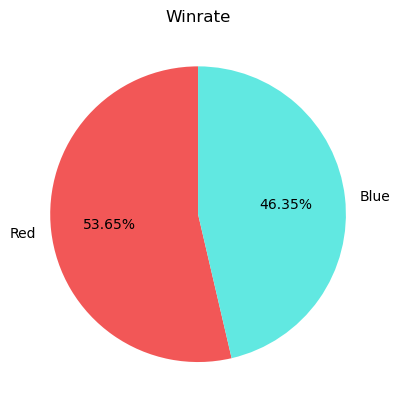

In [8]:
team_dict = {False: "Red",
             True: "Blue"}
labels, winrate = np.unique(df["blueWins"], return_counts=True)
labels = [team_dict.get(label) for label in labels]
color = ["#F25757","#61E8E1"]
plt.pie(winrate, labels=labels, colors=color, startangle=90, autopct="%.2f%%")
plt.title("Winrate")
plt.show()

## Heatmap

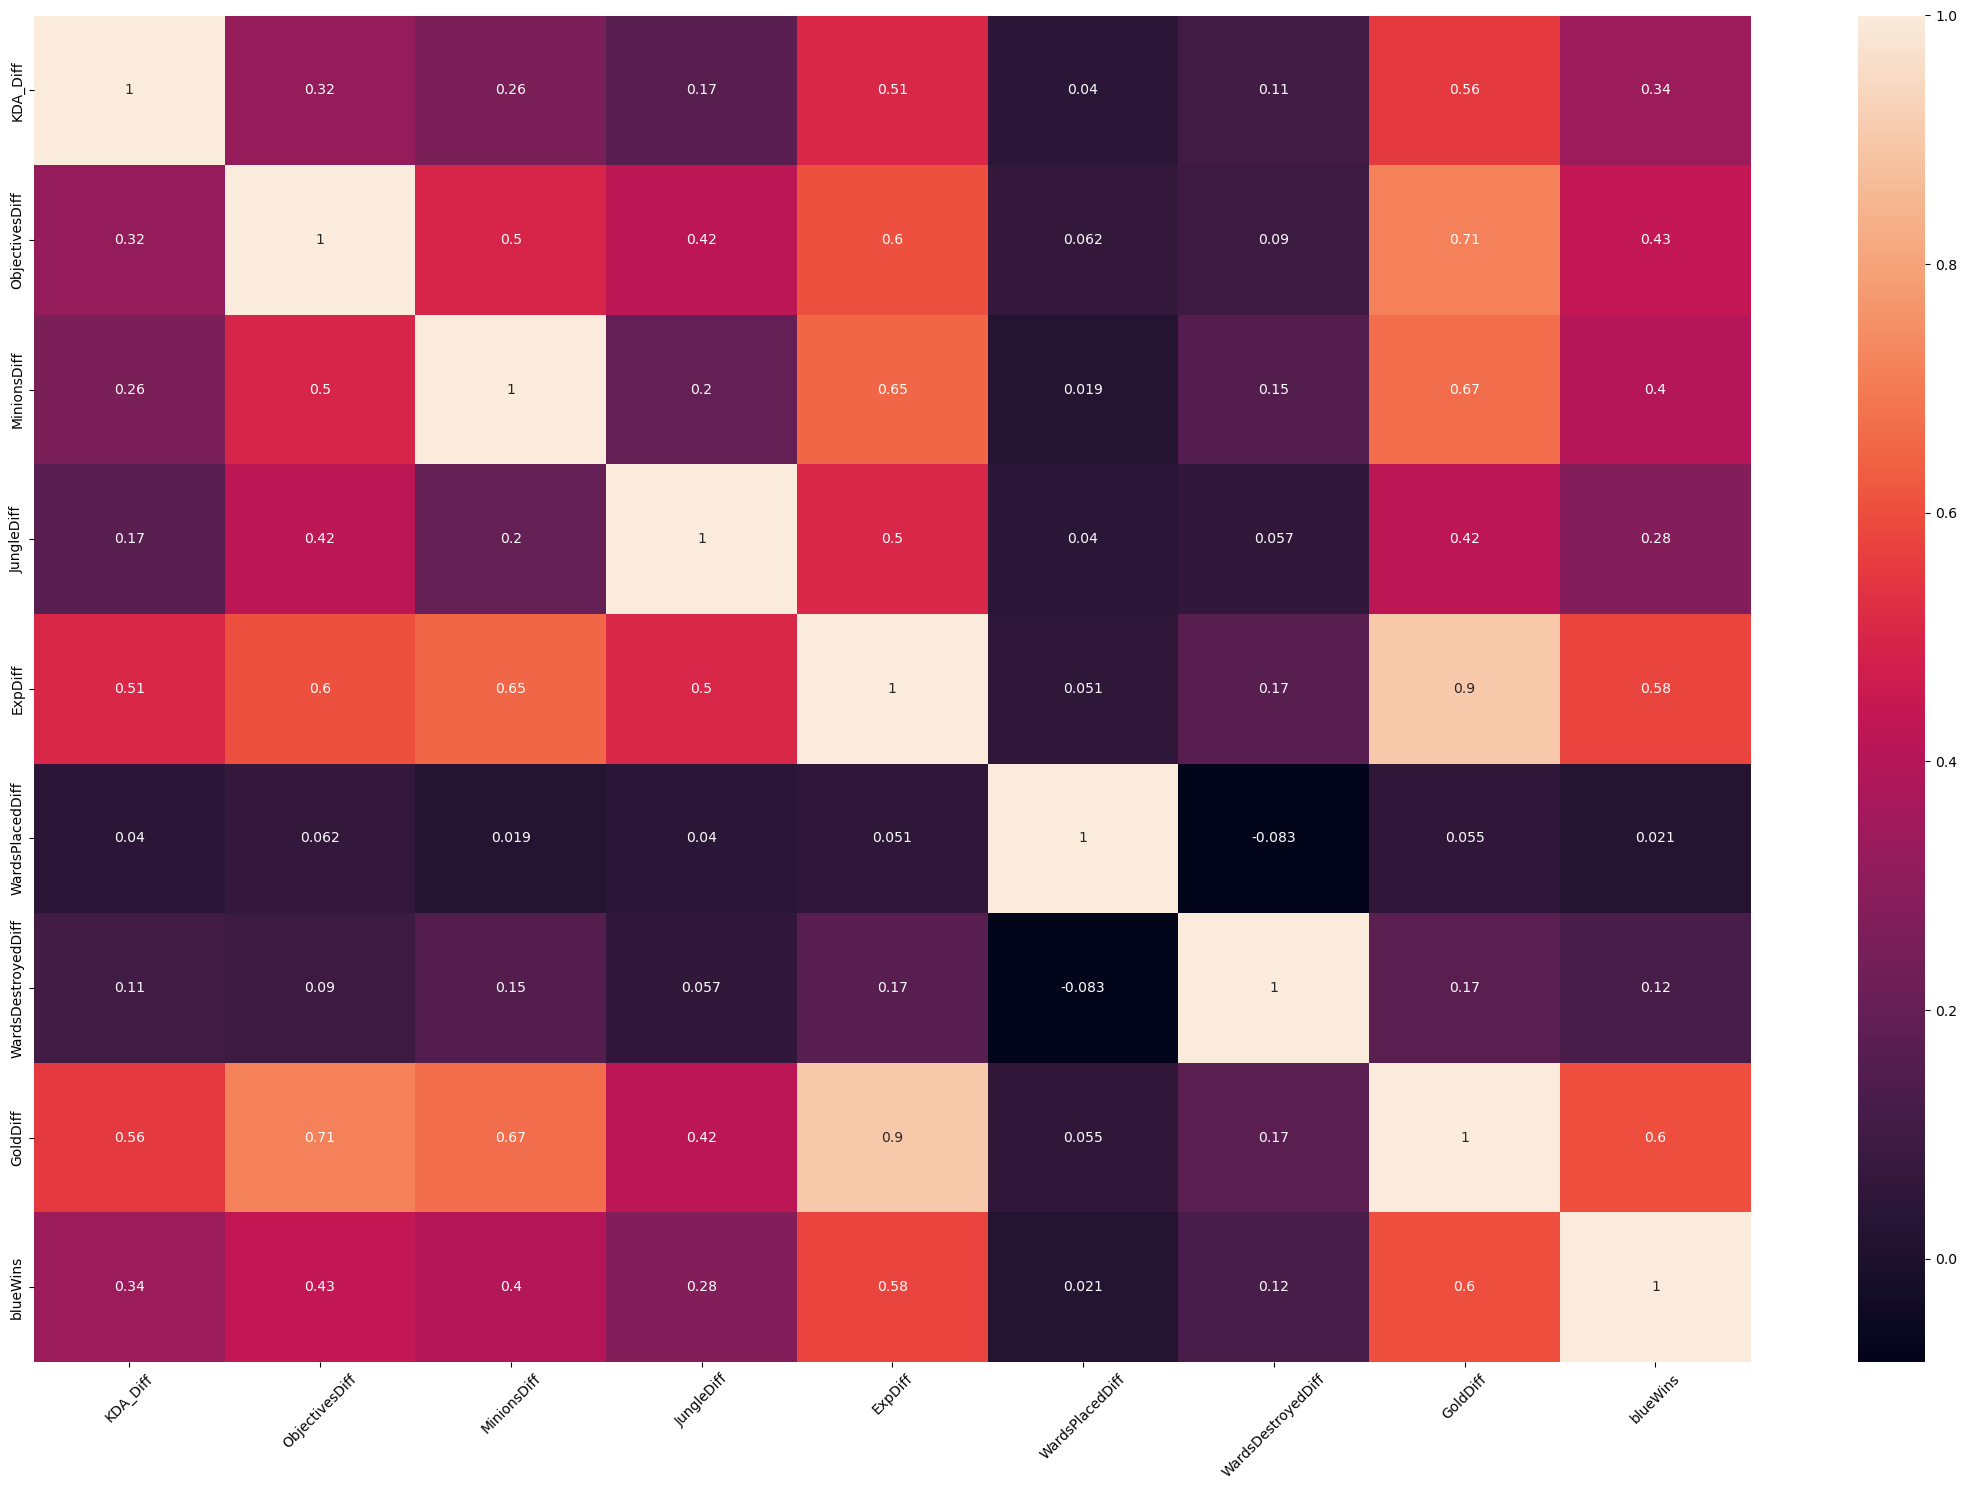

In [9]:
plt.figure(figsize=(22, 15))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Model

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

### Data preprocessing

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [13]:
log_reg = LogisticRegression(max_iter=10000)
log_reg = log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     15037
           1       0.77      0.75      0.76     13268

    accuracy                           0.78     28305
   macro avg       0.78      0.78      0.78     28305
weighted avg       0.78      0.78      0.78     28305



In [14]:
print(f"{accuracy_score(y_test, log_reg_predict):.4f}")

0.7803


### SGD

In [15]:
sgd_log_reg = SGDClassifier(loss="log_loss", max_iter=10000, early_stopping=True)
sgd_log_reg = sgd_log_reg.fit(X_train, y_train)
sgd_log_reg_predict = sgd_log_reg.predict(X_test)
print(classification_report(y_test, sgd_log_reg_predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     15037
           1       0.76      0.77      0.76     13268

    accuracy                           0.78     28305
   macro avg       0.78      0.78      0.78     28305
weighted avg       0.78      0.78      0.78     28305



In [16]:
print(f"{accuracy_score(y_test, sgd_log_reg_predict):.4f}")

0.7783


## Random Forest

In [17]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     15037
           1       0.77      0.74      0.75     13268

    accuracy                           0.77     28305
   macro avg       0.77      0.77      0.77     28305
weighted avg       0.77      0.77      0.77     28305



In [18]:
print(f"{accuracy_score(y_test, rf_predict):.4f}")

0.7722


### Neural Network

In [20]:
def create_model(neurons=32, activation='relu', optimizer="Adam"):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1], ), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0, optimizer='adam', activation='relu', neurons=32, callbacks=[early_stopping])
batch_size = [20, 50, 100]
epochs = [100, 1000, 10000]
optimizers = ["Adam", "SGD"]
neurons = [32, 64, 128]
activation =  ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizers, neurons=neurons, activation=activation)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/home/quocthanh/anaconda3/envs/DA/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1719224274.099172    2227 service.cc:145] XLA service 0x7f80c4008820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719224274.099248    2227 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
I0000 00:00:1719224274.462851    2227 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/home/quocthanh/anaconda3/envs/DA/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When u

Best: 0.780528 using {'activation': 'sigmoid', 'batch_size': 50, 'epochs': 1000, 'neurons': 32, 'optimizer': 'SGD'}
0.778212 (0.000520) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 32, 'optimizer': 'Adam'}
0.779332 (0.001202) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 32, 'optimizer': 'SGD'}
0.777773 (0.000921) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 64, 'optimizer': 'Adam'}
0.777137 (0.001121) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 64, 'optimizer': 'SGD'}
0.777046 (0.002036) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 128, 'optimizer': 'Adam'}
0.777001 (0.000835) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'neurons': 128, 'optimizer': 'SGD'}
0.777621 (0.001171) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 1000, 'neurons': 32, 'optimizer': 'Adam'}
0.778969 (0.001670) with: {'activation': 'relu', 'batch_si